In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Colab Notebooks/dataset/COVID19_Forecasting/'

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(data_path+'train.csv')
data

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0
...,...,...,...,...,...,...,...,...,...
969635,969636,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0
969636,969637,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27
969637,969638,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0
969638,969639,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases,6


In [ ]:
data['Country_Region'].unique()

In [ ]:
data.groupby('Country_Region')['TargetValue'].sum()

치사율 (사망자 합/확진 케이스 합)

In [ ]:
data[data['Country_Region'] == 'Korea, South'][data['Target'] == 'Fatalities']['TargetValue'].sum()*100/data[data['Country_Region'] == 'Korea, South'][data['Target'] == 'ConfirmedCases']['TargetValue'].sum()

2.3103967855349072

일일 최다 확진자 수

In [ ]:
data[data['Country_Region'] == 'Korea, South'][data['Target'] == 'ConfirmedCases']['TargetValue'].max()

851

In [ ]:
SKorea_ConfirmedCases = data[data['Country_Region'] == 'Korea, South'][data['Target'] == 'ConfirmedCases']

최다 확진자 발생 일

In [ ]:
SKorea_ConfirmedCases[SKorea_ConfirmedCases['TargetValue'] == 851]['Date']

43760    2020-03-03
Name: Date, dtype: object

일일 확진자 그래프

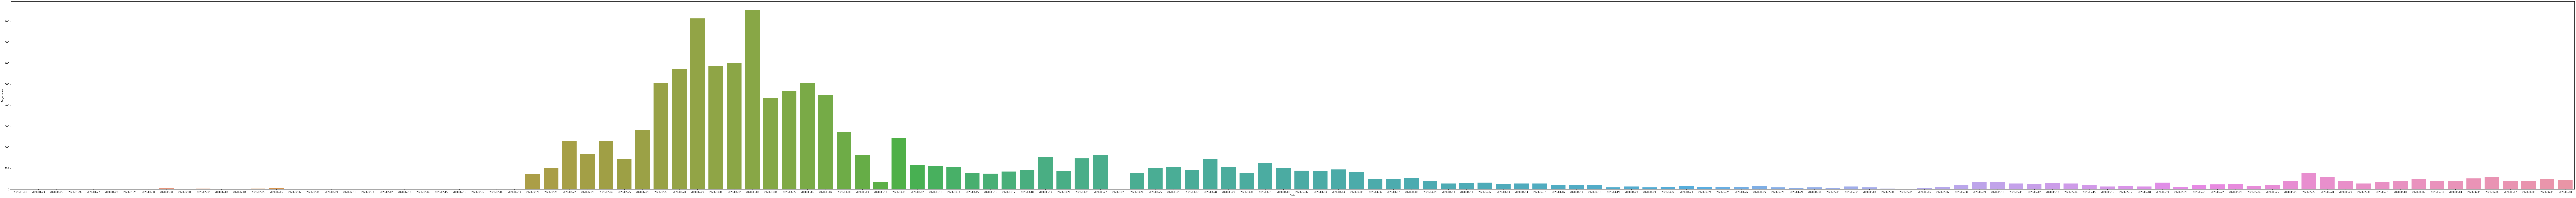

In [ ]:
x_label = SKorea_ConfirmedCases['Date']
y_label = SKorea_ConfirmedCases['TargetValue']
plt.figure(figsize=(200,15))
sns.barplot(x = x_label,y = y_label)

누적 확진자 그래프

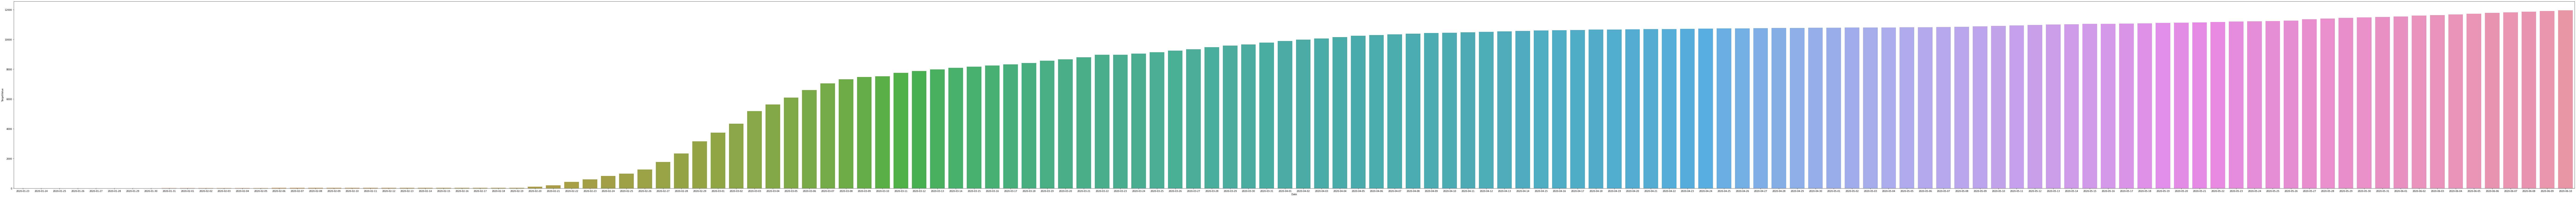

In [ ]:
x_label = SKorea_ConfirmedCases['Date']
y_label = SKorea_ConfirmedCases['TargetValue'].cumsum()
plt.figure(figsize=(200,15))
sns.barplot(x = x_label,y = y_label)

In [ ]:
US_data = data[data['Country_Region'] == 'US'][data['Target'] == 'ConfirmedCases']

In [ ]:
US_data[US_data['Province_State']=='New York']['TargetValue'].max()

11434

In [ ]:
US_data[US_data['TargetValue'] == US_data[US_data['Province_State']=='New York']['TargetValue'].max() ]['Date']

606646    2020-04-15
Name: Date, dtype: object

In [ ]:
US_data.loc[US_data['TargetValue'] == US_data[US_data['Province_State']== 'Washington']['TargetValue'].max()][US_data['Province_State'] == 'Washington']

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
919940,919941,NaN,Washington,US,7535591,0.063151,2020-04-02,ConfirmedCases,781


In [ ]:
df = pd.DataFrame()

In [ ]:
US_data['Province_State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming', nan], dtype=object)

In [ ]:
for state in US_data['Province_State'].unique():
    
    df = df.append(US_data.loc[US_data['TargetValue'] == US_data[US_data['Province_State']== state]['TargetValue'].max()][US_data['Province_State'] == state])

In [ ]:
df

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
86780,86781,NaN,Alabama,US,4887871,0.064926,2020-06-01,ConfirmedCases,678
95050,95051,NaN,Alaska,US,737438,0.074014,2020-03-28,ConfirmedCases,27
99678,99679,NaN,Arizona,US,7171646,0.063349,2020-06-10,ConfirmedCases,1556
120918,120919,NaN,Arkansas,US,3013825,0.067030,2020-05-21,ConfirmedCases,455
137468,137469,NaN,California,US,39557045,0.057165,2020-06-05,ConfirmedCases,3570
155584,155585,NaN,Colorado,US,5695564,0.064287,2020-04-24,ConfirmedCases,978
158100,158101,NaN,Connecticut,US,3572665,0.066274,2020-04-22,ConfirmedCases,2109
159228,159229,NaN,Delaware,US,967171,0.072558,2020-04-26,ConfirmedCases,458
159518,159519,District of Columbia,District of Columbia,US,705749,0.074255,2020-05-01,ConfirmedCases,335
159798,159799,NaN,District of Columbia,US,702455,0.074281,2020-05-01,ConfirmedCases,335


([<matplotlib.patches.Wedge at 0x7f16e3a47320>,
 [Text(1.0995328606342933, 0.032054459679862764, 'Alabama'),
  Text(1.0980567249830375, 0.06535616818270445, 'Alaska'),
  Text(1.0910716389132813, 0.1398666463424585, 'Arizona'),
  Text(1.0749218219976557, 0.23354459230142793, 'Arkansas'),
  Text(1.018666424058399, 0.4151128960849979, 'California'),
  Text(0.9186225587447547, 0.6050889145945741, 'Colorado'),
  Text(0.8304879096825122, 0.7213111893428326, 'Connecticut'),
  Text(0.7460052010703743, 0.8083787725911356, 'Delaware'),
  Text(0.7180211879517228, 0.8333340108578295, 'District of Columbia'),
  Text(0.6937261693386328, 0.8536650408531129, 'District of Columbia'),
  Text(0.6026384888041248, 0.920231955439432, 'Florida'),
  Text(0.4545895912531626, 1.0016727527113247, 'Georgia'),
  Text(0.38715603045773633, 1.0296165344827213, 'Guam'),
  Text(0.3835243825995082, 1.030974804712349, 'Hawaii'),
  Text(0.37139956427330356, 1.0354044444841835, 'Idaho'),
  Text(0.17832381883772255, 1.08544

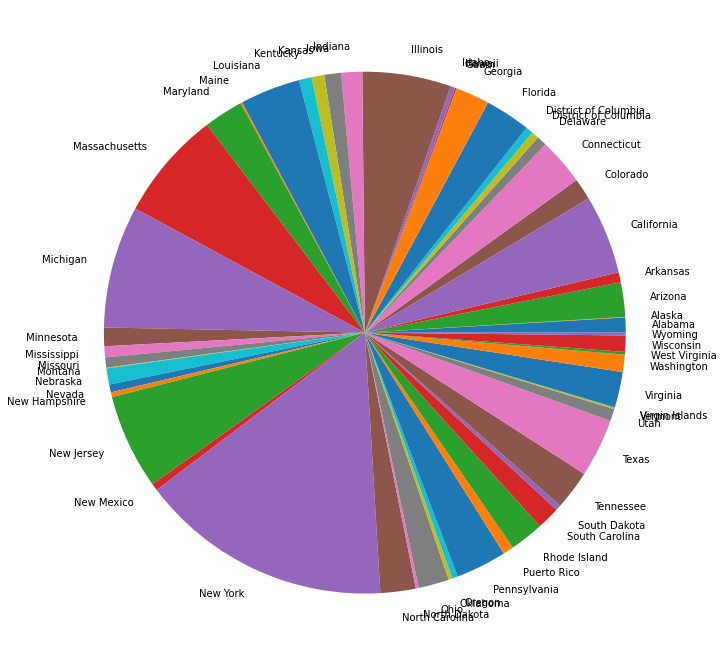

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(x=df['TargetValue'],labels=df['Province_State'])

In [ ]:
US_data.groupby('Province_State')['Province_State']

In [ ]:
US_data.groupby('Province_State')['TargetValue'].sum()

Province_State
Alabama                  43615
Alaska                    1184
Arizona                  59704
Arkansas                 20458
California              279430
Colorado                 56968
Connecticut              88390
Delaware                 20098
District of Columbia     19074
Florida                 134646
Georgia                 104285
Guam                       180
Hawaii                    1358
Idaho                     6520
Illinois                259506
Indiana                  76674
Iowa                     45248
Kansas                   21500
Kentucky                 23760
Louisiana                87846
Maine                     5272
Maryland                118930
Massachusetts           207960
Michigan                126045
Minnesota                57656
Mississippi              36966
Missouri                 31024
Montana                   1122
Nebraska                 31899
Nevada                   20436
New Hampshire            10348
New Jersey              